In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["font.family"]="SimHei"
plt.rcParams["font.size"]=13

In [9]:
# 读取csv文件 

with open ('C:/Users/seven/Documents/Python Scripts/task_2_lianjia_data.csv','r',encoding='utf-8') as f:
    lianjia_data = pd.read_csv(f)
    display(lianjia_data.head())

,简介（方式·小区名 户型 朝向）,区,地铁站,村,面积大小（㎡）,朝向,户型,楼层类型,楼层（层）,标签
0,整租·长桥一村 1室0厅 南,徐汇,长桥,长桥一村,39,南,1室0厅1卫,高楼层,6,随时看房
1,整租·馨宁公寓 1室1厅 南,徐汇,华泾,馨宁公寓,42,南,1室1厅1卫,高楼层,29,"精装,随时看房"
2,整租·长桥三村 2室1厅 南,徐汇,长桥,长桥三村,51,南,2室1厅1卫,高楼层,6,随时看房
3,整租·东湾小区 1室1厅 南,徐汇,华泾,东湾小区,47,南,1室1厅1卫,中楼层,6,随时看房
4,整租·花苑村紫竹园 1室1厅 南,徐汇,康健,花苑村紫竹园,42,南,1室1厅1卫,高楼层,6,随时看房


In [51]:
# 以[面积大小(m²)]字段进行 groupby，统计各个面积下的[房源数量]情况

group_area = lianjia_data.groupby(r"面积大小（㎡）")[r"简介（方式·小区名 户型 朝向）"].agg({"房源数量": "count"})
display(group_area)


,房源数量
面积大小（㎡）,
38,24
39,11
40,9
41,22
42,20
43,15
44,8


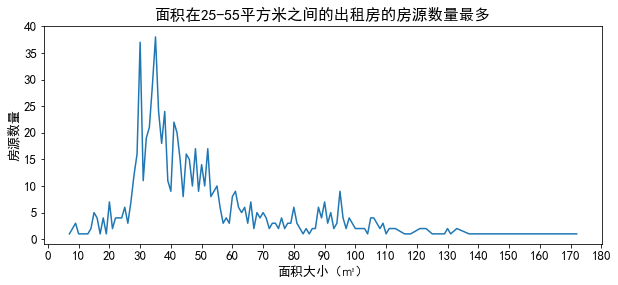

In [59]:
# 将所统计数据，作折线图和条形图，并得出相关结论
area = group_area.index
num = group_area.values.reshape(-1)

plt.figure(figsize=(10,4))
plt.plot(area, num)
plt.xticks(range(0,np.max(area)+10,10))
plt.yticks(range(0,np.max(num)+5,5))
plt.xlabel("面积大小（㎡）") 
plt.ylabel("房源数量")
plt.title("面积在25-55平方米之间的出租房的房源数量最多")
plt.show()


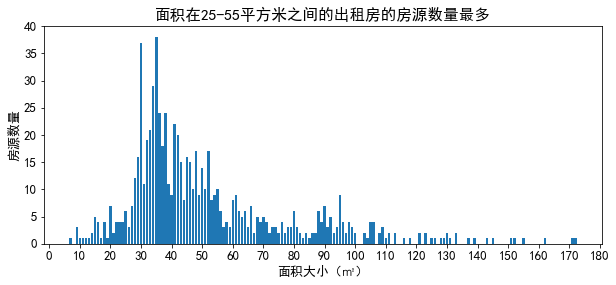

In [60]:
plt.figure(figsize=(10,4))
plt.bar(area,num)
plt.xticks(range(0, np.max(area)+10, 10))
plt.yticks(range(0, np.max(num)+5,5))
plt.xlabel("面积大小（㎡）") 
plt.ylabel("房源数量")
plt.title("面积在25-55平方米之间的出租房的房源数量最多")
plt.show()

In [56]:
# 以【区】字段进行 groupby，统计各个上海各个“区”所属的【房源数量】情况

group_region = lianjia_data.groupby("区")["简介（方式·小区名 户型 朝向）"].agg({"房源数量": "count"})
display(group_region)

,房源数量
区,
嘉定,6
奉贤,1
徐汇,126
普陀,22
杨浦,56
松江,45
浦东,106
虹口,24
长宁,86


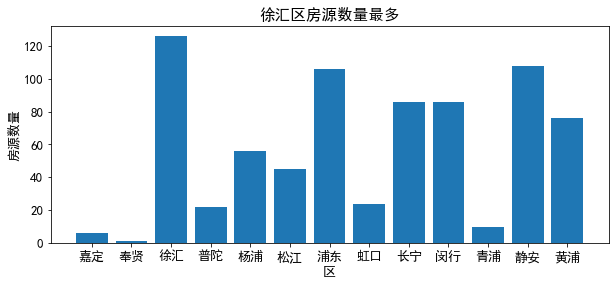

In [65]:
# 将所统计数据，作条形图，并得出相关结论
region = group_region.index
num_2 = group_region.values.reshape(-1)

plt.figure(figsize=(10,4))
plt.xlabel("区")
plt.ylabel("房源数量")
plt.bar(region, num_2)
plt.title("徐汇区房源数量最多")
plt.show()


In [66]:
# 以【楼层类型】字段进行 groupby，统计各个楼层所属的【房源数量】情况
group_floor = lianjia_data.groupby("楼层类型")["简介（方式·小区名 户型 朝向）"].agg({"房源数量": "count"})
display(group_floor)

,房源数量
楼层类型,
中楼层,231
低楼层,146
地下室,5
高楼层,370


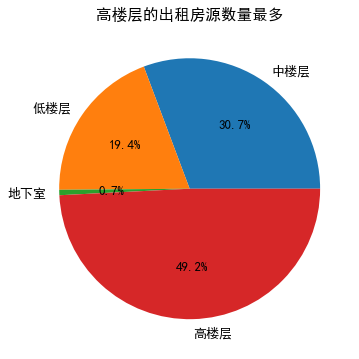

In [88]:
# 将所统计数据，作饼图(阅读参考文章 9)，并得出相关结论

floor = group_floor.index.to_list()
floor = [x.strip() for x in floor]
num_3 = group_floor.values.reshape(-1)

plt.figure(figsize=(6,6))
plt.pie(num_3,labels=floor,autopct="%.1f%%")   
# autopct :控制饼图内百分比设置,可以使用format字符串或者format function
# %% 转义 输出%
plt.title("高楼层的出租房源数量最多")
plt.show()